<a href="https://www.kaggle.com/code/abdalrhamnhebishy/hungery-index-analysis?scriptVersionId=191690221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #5050dc ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## Dataset Description  :

* this Dataset Download from Kaggle .  


* This year’s **Global Hunger Index (GHI) ** : shows that, though some countries have made significant headway, little progress has been made in reducing hunger on a global scale since 2015.

* The 2023 GHI score for the world is 18.3, considered moderate—less than one point below the world’s 2015 GHI score of

19.1. Furthermore,since 2017 the prevalence of undernourishment, one of the indicators used in the calculation of GHI

scores, has been on the rise, and the number of undernourished people has climbed from 572 million to about 735 million.

South Asia and Africa South of the Sahara are the world regions with the highest hunger levels, with GHI scores of 27.0

each, indicating serious hunger. For the past two decades,

these two regions have consistently had the highest levels of hunger. While both regions achieved considerable progress

between 2000 and 2015, progress since 2015 has nearly halted, mirroring the trend seen for the world as a whole.


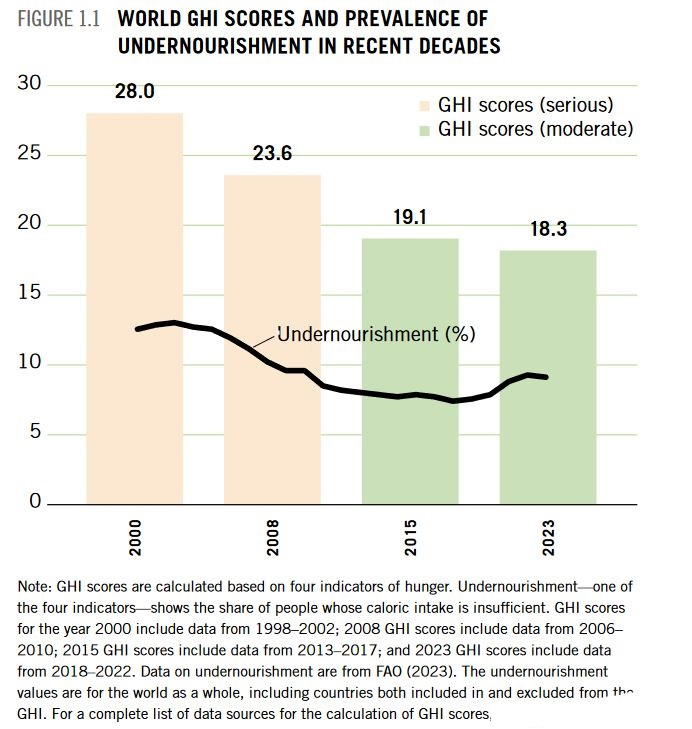

In [2]:
# image 1:
from IPython.display import display ,Image
img1=Image("hunger5.jpeg")
display(img1)

## understanding the problem & Target :

  * problem : this problem consider as Analysis problem

  
  * Solving Techniques : By using ordinary Statistical pkgs

     
  
  * we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

     data visualization , split and preparing data to bulding models .

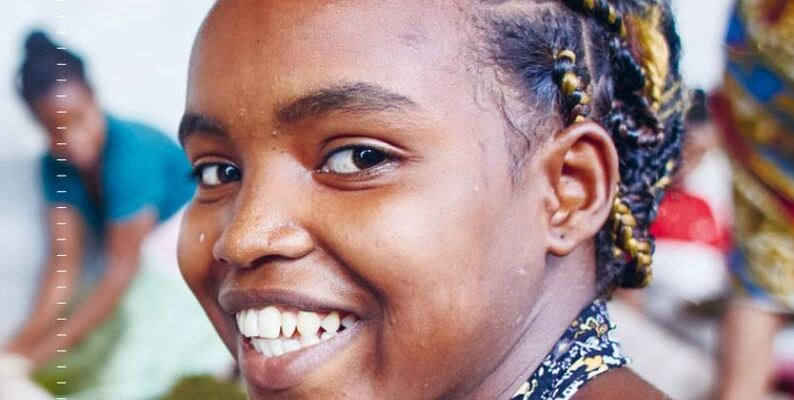

In [3]:
img2=Image("hunger1.JPG")
display(img2)

 ## pandas Analysis :

In [4]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image
from plotly.graph_objs import *
import plotly.express as px 

In [5]:
# load the data:

data=pd.read_csv("GHI.csv")
data.head(25)

Rank                Country  2000  2008 2015 2023  \
0      1                Belarus    <5    <5   <5   <5   
1      1   Bosnia & Herzegovina   9.4   6.5  5.3   <5   
2      1                  Chile    <5    <5   <5   <5   
3      1                  China  13.4   7.1   <5   <5   
4      1                Croatia    <5    <5   <5   <5   
5      1                Estonia    <5    <5   <5   <5   
6      1                Georgia  12.1   6.6   <5   <5   
7      1                Hungary   6.7   5.6    5   <5   
8      1                 Kuwait    <5    <5   <5   <5   
9      1                 Latvia    <5    <5   <5   <5   
10     1              Lithuania   7.6   5.1   <5   <5   
11     1  Moldova (Republic of)  18.6    17   <5   <5   
12     1             Montenegro     —   5.2   <5   <5   
13     1        North Macedonia   7.5   5.3  5.3   <5   
14     1                Romania   7.9   5.8  5.1   <5   
15     1                 Serbia     —   5.8   <5   <5   
16     1               Slovakia   7.2   5.7  5.7   <5   
17     1                Türkiye  10.1   5.7   <5   <5   
18     1   United Arab Emirates    <5   6.8  5.6   <5   
19     1                Uruguay   7.6   5.3   <5   <5   
20    21             Uzbekistan  24.2  14.9  5.9    5   
21    22             Costa Rica   6.9    <5   <5  5.1   
22    23               Bulgaria   8.6   7.7  7.3  5.4   
23    24             Kazakhstan  11.3    11  5.7  5.5   
24    25                Armenia  19.2  11.7  6.3  5.6   

   Absolute change since 2015 % change since 2015  
0                           —                   —  
1                           —                   —  
2                           —                   —  
3                           —                   —  
4                           —                   —  
5                           —                   —  
6                           —                   —  
7                           —                   —  
8                           —                   —  
9                           —                   —  
10                          —                   —  
11                        NaN                 NaN  
12                          —                   —  
13                          —                   —  
14                          —                   —  
15                          —                   —  
16                          —                   —  
17                          —                   —  
18                          —                   —  
19                          —                   —  
20                       -0.9               -15.3  
21                          —                   —  
22                       -1.9                 -26  
23                       -0.2                -3.5  
24                       -0.7               -11.1

In [6]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 125 entries, 0 to 124

Data columns (total 8 columns):

 #   Column                      Non-Null Count  Dtype 

---  ------                      --------------  ----- 

 0   Rank                        125 non-null    int64 

 1   Country                     125 non-null    object

 2   2000                        125 non-null    object

 3   2008                        125 non-null    object

 4   2015                        125 non-null    object

 5   2023                        125 non-null    object

 6   Absolute change since 2015  121 non-null    object

 7   % change since 2015         121 non-null    object

dtypes: int64(1), object(7)

memory usage: 7.9+ KB

None

-------------------------

shape of the dataset -->> (125, 8)


In [7]:
#get the statistical:
data.describe().T

count    mean        std  min   25%   50%   75%    max
Rank  125.0  61.376  38.474052  1.0  32.0  62.0  94.0  125.0

In [8]:
# get Types of data:

data.dtypes

Rank                           int64
Country                       object
2000                          object
2008                          object
2015                          object
2023                          object
Absolute change since 2015    object
% change since 2015           object
dtype: object

In [9]:
#check if there null values in data:
data.isna().mean()

Rank                          0.000
Country                       0.000
2000                          0.000
2008                          0.000
2015                          0.000
2023                          0.000
Absolute change since 2015    0.032
% change since 2015           0.032
dtype: float64

## Cleaning Data :

In [10]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

Rank                   Country  2000  2008  2015  2023  \
0       1                   Belarus    <5    <5    <5    <5   
1       1      Bosnia & Herzegovina   9.4   6.5   5.3    <5   
2       1                     Chile    <5    <5    <5    <5   
3       1                     China  13.4   7.1    <5    <5   
4       1                   Croatia    <5    <5    <5    <5   
..    ...                       ...   ...   ...   ...   ...   
120   121                   Lesotho  32.5  27.8  30.6  35.5   
121   122    Dem. Rep. of the Congo  46.3  40.2  36.4  35.7   
122   123                     Yemen  41.4  37.8  42.1  39.9   
123   124                Madagascar  42.4  36.6  38.9    41   
124   125  Central African Republic  48.2  43.7    44  42.3   

    Absolutechangesince2015 changesince2015  
0                         —               —  
1                         —               —  
2                         —               —  
3                         —               —  
4                         —               —  
..                      ...             ...  
120                     4.9              16  
121                    -0.7            -1.9  
122                    -2.2            -5.2  
123                     2.1             5.4  
124                    -1.7            -3.9  

[125 rows x 8 columns]

In [11]:
# Use the replace method with a regular expression to remove > and < characters
years=['2000','2008','2015','2023']
for year in years:
  data[year] = data[year].replace(to_replace='>', value="bigger_than_", regex=True)
  data[year] = data[year].replace(to_replace='<', value="smaller_than_", regex=True)


data.head(40)

Rank                Country            2000            2008  \
0      1                Belarus  smaller_than_5  smaller_than_5   
1      1   Bosnia & Herzegovina             9.4             6.5   
2      1                  Chile  smaller_than_5  smaller_than_5   
3      1                  China            13.4             7.1   
4      1                Croatia  smaller_than_5  smaller_than_5   
5      1                Estonia  smaller_than_5  smaller_than_5   
6      1                Georgia            12.1             6.6   
7      1                Hungary             6.7             5.6   
8      1                 Kuwait  smaller_than_5  smaller_than_5   
9      1                 Latvia  smaller_than_5  smaller_than_5   
10     1              Lithuania             7.6             5.1   
11     1  Moldova (Republic of)            18.6              17   
12     1             Montenegro               —             5.2   
13     1        North Macedonia             7.5             5.3   
14     1                Romania             7.9             5.8   
15     1                 Serbia               —             5.8   
16     1               Slovakia             7.2             5.7   
17     1                Türkiye            10.1             5.7   
18     1   United Arab Emirates  smaller_than_5             6.8   
19     1                Uruguay             7.6             5.3   
20    21             Uzbekistan            24.2            14.9   
21    22             Costa Rica             6.9  smaller_than_5   
22    23               Bulgaria             8.6             7.7   
23    24             Kazakhstan            11.3              11   
24    25                Armenia            19.2            11.7   
25    26     Russian Federation            10.2             5.8   
26    27                Tunisia            10.3             7.4   
27    28                 Mexico            10.2             9.9   
28    28               Paraguay            11.8            10.1   
29    30                Albania            16.4            15.5   
30    31              Argentina             6.8             5.5   
31    32                 Brazil            11.7             6.8   
32    33                Algeria            14.7            11.1   
33    34             Azerbaijan            24.9              15   
34    35               Colombia              11            10.2   
35    36                   Peru            20.6              14   
36    37           Saudi Arabia            12.3            10.6   
37    38                Jamaica             8.5             8.6   
38    38             Kyrgyzstan            17.5            12.9   
39    38               Mongolia            29.9            16.7   

              2015            2023 Absolutechangesince2015 changesince2015  
0   smaller_than_5  smaller_than_5                       —               —  
1              5.3  smaller_than_5                       —               —  
2   smaller_than_5  smaller_than_5                       —               —  
3   smaller_than_5  smaller_than_5                       —               —  
4   smaller_than_5  smaller_than_5                       —               —  
5   smaller_than_5  smaller_than_5                       —               —  
6   smaller_than_5  smaller_than_5                       —               —  
7                5  smaller_than_5                       —               —  
8   smaller_than_5  smaller_than_5                       —               —  
9   smaller_than_5  smaller_than_5                       —               —  
10  smaller_than_5  smaller_than_5                       —               —  
11  smaller_than_5  smaller_than_5                     NaN             NaN  
12  smaller_than_5  smaller_than_5                       —               —  
13             5.3  smaller_than_5                       —               —  
14             5.1  smaller_than_5                       —               —  
15  smaller_than_5  smal

In [12]:
# cleaning categorical features from the null values if found   :
for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

Rank                   Country            2000            2008  \
0       1                   Belarus  smaller_than_5  smaller_than_5   
1       1      Bosnia & Herzegovina             9.4             6.5   
2       1                     Chile  smaller_than_5  smaller_than_5   
3       1                     China            13.4             7.1   
4       1                   Croatia  smaller_than_5  smaller_than_5   
..    ...                       ...             ...             ...   
120   121                   Lesotho            32.5            27.8   
121   122    Dem. Rep. of the Congo            46.3            40.2   
122   123                     Yemen            41.4            37.8   
123   124                Madagascar            42.4            36.6   
124   125  Central African Republic            48.2            43.7   

               2015            2023 Absolutechangesince2015 changesince2015  
0    smaller_than_5  smaller_than_5                       —               —  
1               5.3  smaller_than_5                       —               —  
2    smaller_than_5  smaller_than_5                       —               —  
3    smaller_than_5  smaller_than_5                       —               —  
4    smaller_than_5  smaller_than_5                       —               —  
..              ...             ...                     ...             ...  
120            30.6            35.5                     4.9              16  
121            36.4            35.7                    -0.7            -1.9  
122            42.1            39.9                    -2.2            -5.2  
123            38.9              41                     2.1             5.4  
124              44            42.3                    -1.7            -3.9  

[125 rows x 8 columns]

In [13]:
# cleaning Numerical features from the null values if found   :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

Rank                   Country            2000            2008  \
0      1.0                   Belarus  smaller_than_5  smaller_than_5   
1      1.0      Bosnia & Herzegovina             9.4             6.5   
2      1.0                     Chile  smaller_than_5  smaller_than_5   
3      1.0                     China            13.4             7.1   
4      1.0                   Croatia  smaller_than_5  smaller_than_5   
..     ...                       ...             ...             ...   
120  121.0                   Lesotho            32.5            27.8   
121  122.0    Dem. Rep. of the Congo            46.3            40.2   
122  123.0                     Yemen            41.4            37.8   
123  124.0                Madagascar            42.4            36.6   
124  125.0  Central African Republic            48.2            43.7   

               2015            2023 Absolutechangesince2015 changesince2015  
0    smaller_than_5  smaller_than_5                       —               —  
1               5.3  smaller_than_5                       —               —  
2    smaller_than_5  smaller_than_5                       —               —  
3    smaller_than_5  smaller_than_5                       —               —  
4    smaller_than_5  smaller_than_5                       —               —  
..              ...             ...                     ...             ...  
120            30.6            35.5                     4.9              16  
121            36.4            35.7                    -0.7            -1.9  
122            42.1            39.9                    -2.2            -5.2  
123            38.9              41                     2.1             5.4  
124              44            42.3                    -1.7            -3.9  

[125 rows x 8 columns]

In [14]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in Rank -->> 

 Rank

1.0      20

38.0      3

88.0      2

107.0     2

58.0      2

         ..

54.0      1

53.0      1

50.0      1

49.0      1

125.0     1

Name: count, Length: 94, dtype: int64

-------------------------

counts of items in Country -->> 

 Country

Belarus                     1

Gabon                       1

Djibouti                    1

Comoros                     1

Benin                       1

                           ..

Jamaica                     1

Saudi Arabia                1

Peru                        1

Colombia                    1

Central African Republic    1

Name: count, Length: 125, dtype: int64

-------------------------

counts of items in 2000 -->> 

 2000

smaller_than_5    7

—                 4

10.2              2

41.4              2

15.4              2

                 ..

17.2              1

15.8              1

14.8              1

13                1

42.4              1

Name: count, Length: 101, dtype:

In [15]:
# check agin the null values after cleaning the Data :
data.isna().sum()

Rank                       0
Country                    0
2000                       0
2008                       0
2015                       0
2023                       0
Absolutechangesince2015    0
changesince2015            0
dtype: int64

## Data Explantory by using pandas :

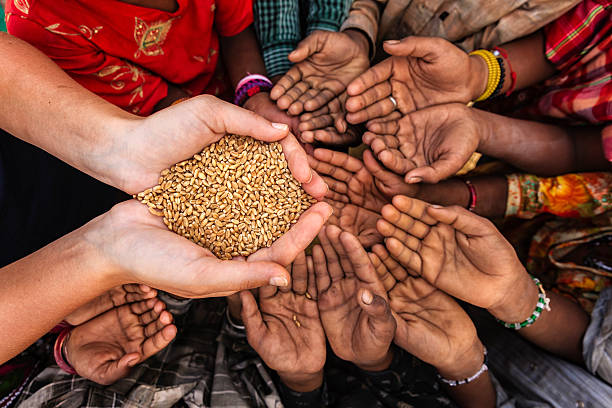

In [16]:
from IPython.display import display ,Image
img3=Image("hunger2.jpg")
display(img3)

In [17]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Country', '2000', '2008', '2015', '2023', 'Absolutechangesince2015',

       'changesince2015'],

      dtype='object')

 Numerical_columns ----->>> Index(['Rank'], dtype='object') 

 Discrete_columns ---->>> Index([], dtype='object') 

 Continous_cols ----->> Index(['Rank'], dtype='object') 

 Nominal Columns --->> Series([], dtype: int64)


In [18]:
# Describe object :
data.describe(include="O").T

count unique             top freq
Country                   125    125         Belarus    1
2000                      125    101  smaller_than_5    7
2008                      125    101  smaller_than_5    7
2015                      125     95  smaller_than_5   15
2023                      125     94  smaller_than_5   20
Absolutechangesince2015   125     57               —   24
changesince2015           125     87               —   24

## sql Analysis :

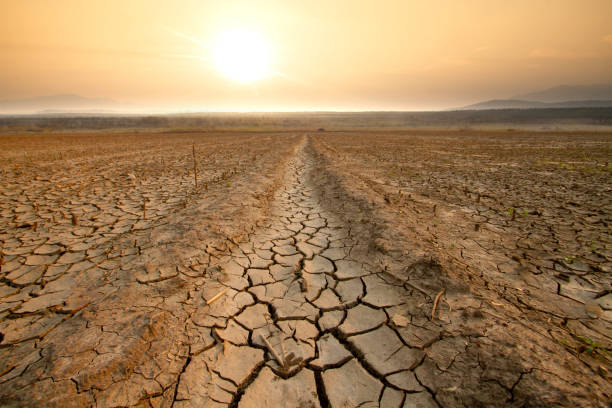

In [19]:
from IPython.display import display ,Image
img4=Image("hunger3.jpg")
display(img4)

In [20]:
# Connect to the database
conn = sqlite3.connect('hungery.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'Air' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='hungery1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("hungery1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'hungery1' already exists. Skipping table creation.")


The table 'hungery1' already exists. Skipping table creation.


In [21]:
df= pd.read_sql("SELECT * FROM hungery1", conn)
df

index   Rank                   Country            2000            2008  \
0        0    1.0                   Belarus  smaller_than_5  smaller_than_5   
1        1    1.0      Bosnia & Herzegovina             9.4             6.5   
2        2    1.0                     Chile  smaller_than_5  smaller_than_5   
3        3    1.0                     China            13.4             7.1   
4        4    1.0                   Croatia  smaller_than_5  smaller_than_5   
..     ...    ...                       ...             ...             ...   
120    120  121.0                   Lesotho            32.5            27.8   
121    121  122.0    Dem. Rep. of the Congo            46.3            40.2   
122    122  123.0                     Yemen            41.4            37.8   
123    123  124.0                Madagascar            42.4            36.6   
124    124  125.0  Central African Republic            48.2            43.7   

               2015            2023 Absolutechangesince2015 changesince2015  
0    smaller_than_5  smaller_than_5                       —               —  
1               5.3  smaller_than_5                       —               —  
2    smaller_than_5  smaller_than_5                       —               —  
3    smaller_than_5  smaller_than_5                       —               —  
4    smaller_than_5  smaller_than_5                       —               —  
..              ...             ...                     ...             ...  
120            30.6            35.5                     4.9              16  
121            36.4            35.7                    -0.7            -1.9  
122            42.1            39.9                    -2.2            -5.2  
123            38.9              41                     2.1             5.4  
124              44            42.3                    -1.7            -3.9  

[125 rows x 9 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 125 entries, 0 to 124

Data columns (total 9 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   index                    125 non-null    int64  

 1   Rank                     125 non-null    float64

 2   Country                  125 non-null    object 

 3   2000                     125 non-null    object 

 4   2008                     125 non-null    object 

 5   2015                     125 non-null    object 

 6   2023                     125 non-null    object 

 7   Absolutechangesince2015  125 non-null    object 

 8   changesince2015          125 non-null    object 

dtypes: float64(1), int64(1), object(7)

memory usage: 8.9+ KB


In [23]:
df.describe().T

count    mean        std  min   25%   50%   75%    max
index  125.0  62.000  36.228442  0.0  31.0  62.0  93.0  124.0
Rank   125.0  61.376  38.474052  1.0  32.0  62.0  94.0  125.0

In [24]:
# check null_values :
df.isna().sum()

index                      0
Rank                       0
Country                    0
2000                       0
2008                       0
2015                       0
2023                       0
Absolutechangesince2015    0
changesince2015            0
dtype: int64

In [25]:
# cleaning : index column is not useful for that i will drop it :

df=df.drop(columns="index",axis=1)
df

Rank                   Country            2000            2008  \
0      1.0                   Belarus  smaller_than_5  smaller_than_5   
1      1.0      Bosnia & Herzegovina             9.4             6.5   
2      1.0                     Chile  smaller_than_5  smaller_than_5   
3      1.0                     China            13.4             7.1   
4      1.0                   Croatia  smaller_than_5  smaller_than_5   
..     ...                       ...             ...             ...   
120  121.0                   Lesotho            32.5            27.8   
121  122.0    Dem. Rep. of the Congo            46.3            40.2   
122  123.0                     Yemen            41.4            37.8   
123  124.0                Madagascar            42.4            36.6   
124  125.0  Central African Republic            48.2            43.7   

               2015            2023 Absolutechangesince2015 changesince2015  
0    smaller_than_5  smaller_than_5                       —               —  
1               5.3  smaller_than_5                       —               —  
2    smaller_than_5  smaller_than_5                       —               —  
3    smaller_than_5  smaller_than_5                       —               —  
4    smaller_than_5  smaller_than_5                       —               —  
..              ...             ...                     ...             ...  
120            30.6            35.5                     4.9              16  
121            36.4            35.7                    -0.7            -1.9  
122            42.1            39.9                    -2.2            -5.2  
123            38.9              41                     2.1             5.4  
124              44            42.3                    -1.7            -3.9  

[125 rows x 8 columns]

## Data Explantory by using sqlite3:

In [26]:
# Q1 : How many of countries that rank is 1 :
R1=cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1 WHERE  RANK='1' ")
print("Number first countries from hungery =",R1.fetchall())

# Q1 : How many of countries that their pepol suffer from hungery (rank=1) and  Absolutechangesince2015 >4 : 
R2=cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1  WHERE RANK='1' AND ABSOLUTECHANGESINCE2015 > '4' ")
print("Number first countries from hungery and absolute changes since2015 bigger than 4",R2.fetchall())

# Q1 : whats names of quantries whose pepole consider as first hungries :
R3=cursor.execute("SELECT (COUNTRY) FROM HUNGERY1 WHERE  RANK='1' ")
print(" first countries from hungery =",R3.fetchall())


Number first countries from hungery = [(20,)]

Number first countries from hungery and absolute changes since2015 bigger than 4 [(20,)]

 first countries from hungery = [('Belarus',), ('Bosnia & Herzegovina',), ('Chile',), ('China',), ('Croatia',), ('Estonia',), ('Georgia',), ('Hungary',), ('Kuwait',), ('Latvia',), ('Lithuania',), ('Moldova (Republic of)',), ('Montenegro',), ('North Macedonia',), ('Romania',), ('Serbia',), ('Slovakia',), ('Türkiye',), ('United Arab Emirates',), ('Uruguay',)]


In [27]:
# Q2: in 2000 year how many of countries that consider from the first countries from hungries and smaller_than_5 :

R4=cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1 WHERE  RANK='1' AND 2000 = 'smaller_than_5'  ")
print("Number first countries from hungery =",R4.fetchall())

#Q2 :How many of countries whose changesince2015 equal  5.4 :

R5=cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1 WHERE  CHANGESINCE2015='5.4'  ")
print("Number first countries from hungery =",R5.fetchall())



Number first countries from hungery = [(0,)]

Number first countries from hungery = [(1,)]


In [28]:
#Q3: whats number of countries  max of changesince2015 :
R6 = cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1 WHERE  CHANGESINCE2015=(SELECT MAX(CHANGESINCE2015) FROM HUNGERY1  )")
print("Number of countries that have max  changes for 2015  :", R6.fetchall())

#Q3: whats number of countries  min of changesince2015 :
R7 = cursor.execute("SELECT COUNT(COUNTRY) FROM HUNGERY1 WHERE  CHANGESINCE2015=(SELECT MIN(CHANGESINCE2015) FROM HUNGERY1  )")
print("Number of countries that have min  changes for 2015  :", R7.fetchall())



Number of countries that have max  changes for 2015  : [(24,)]

Number of countries that have min  changes for 2015  : [(1,)]


## Visualization the Dataset

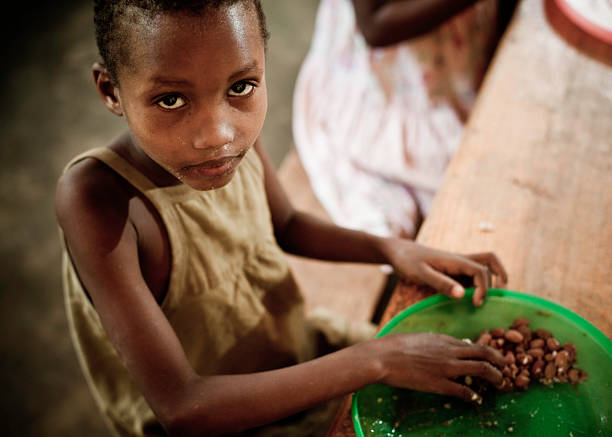

In [29]:
from IPython.display import display ,Image
img5=Image("hunger4.jpg")
display(img5)

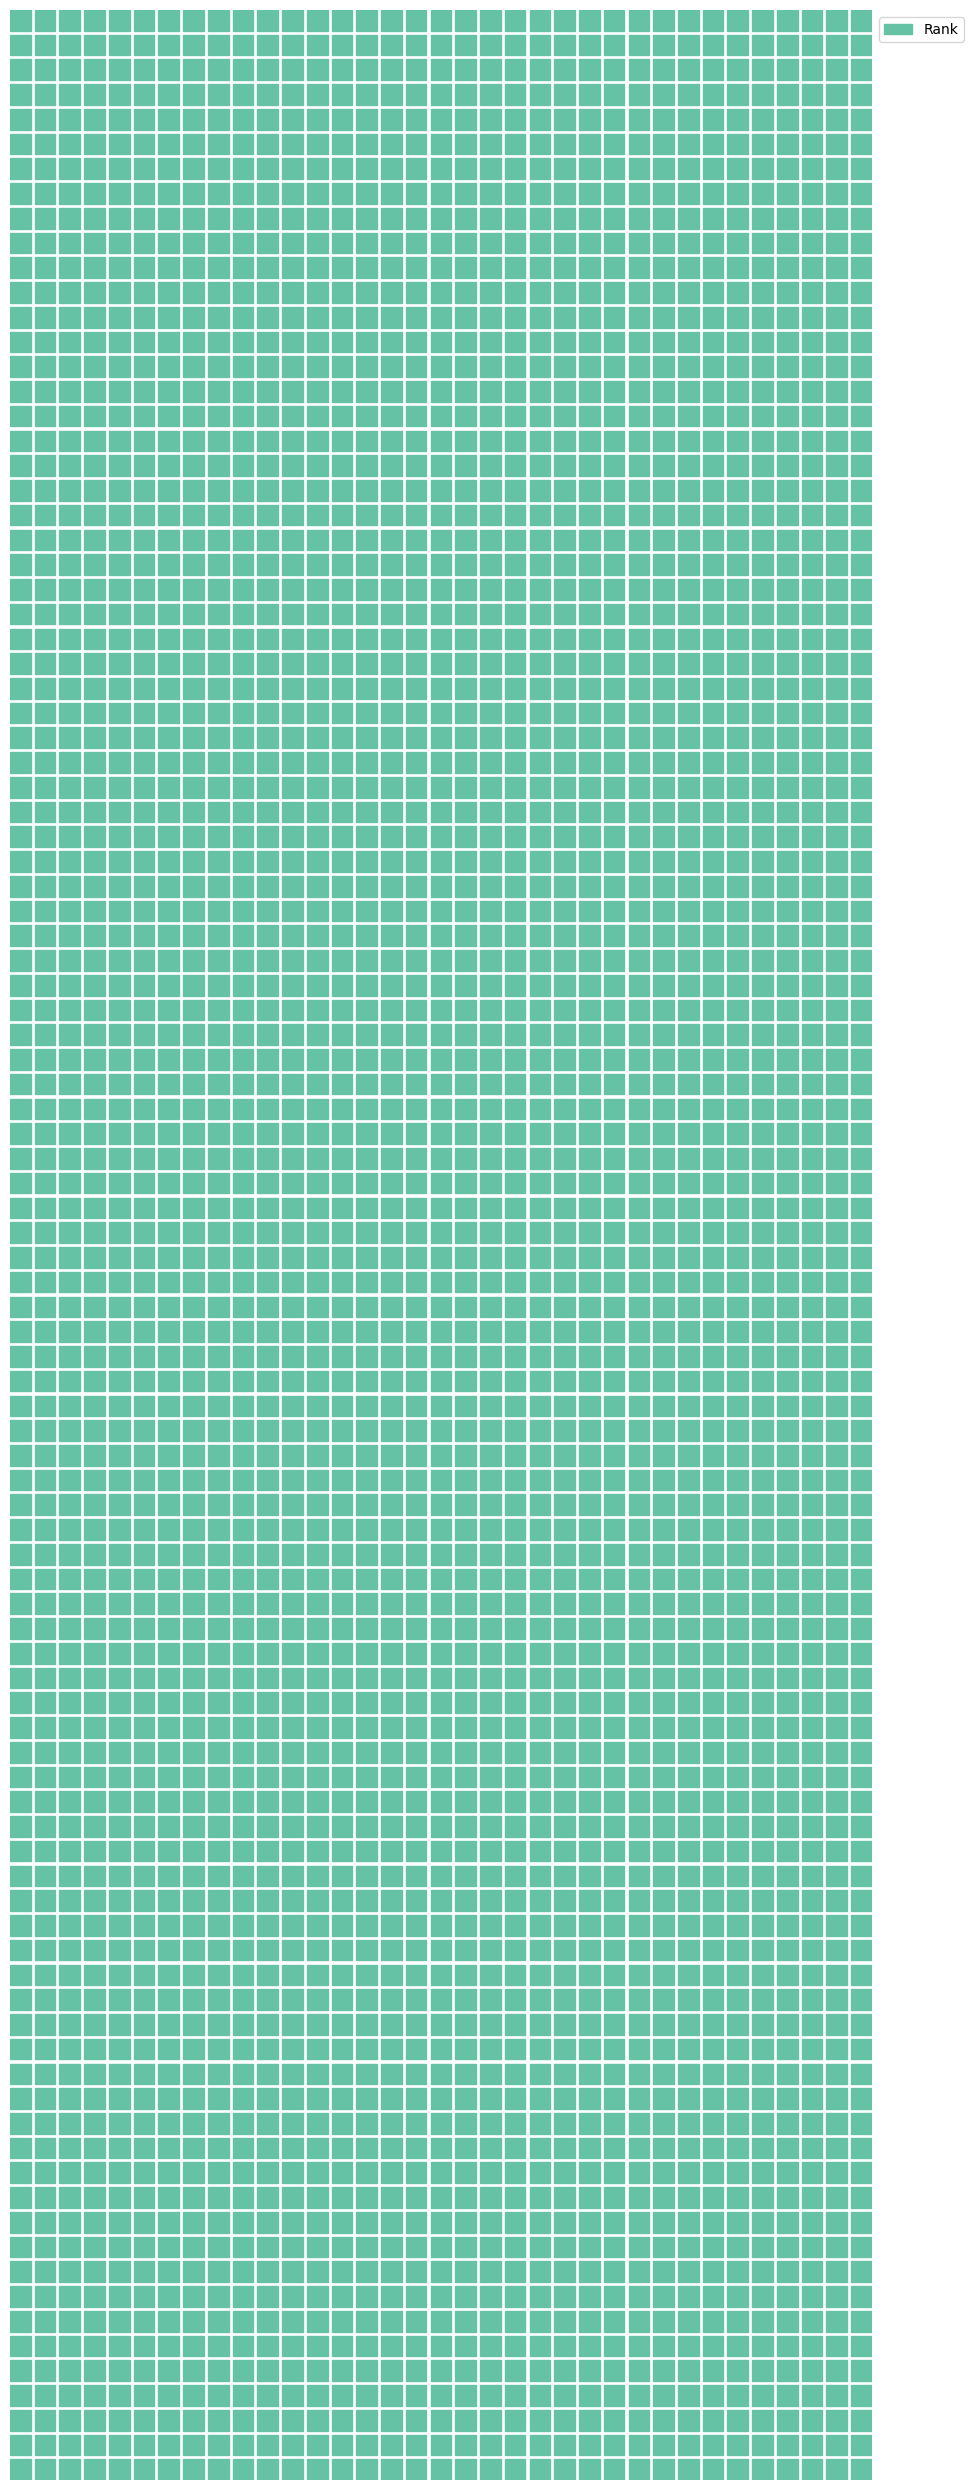

In [30]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features : 

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

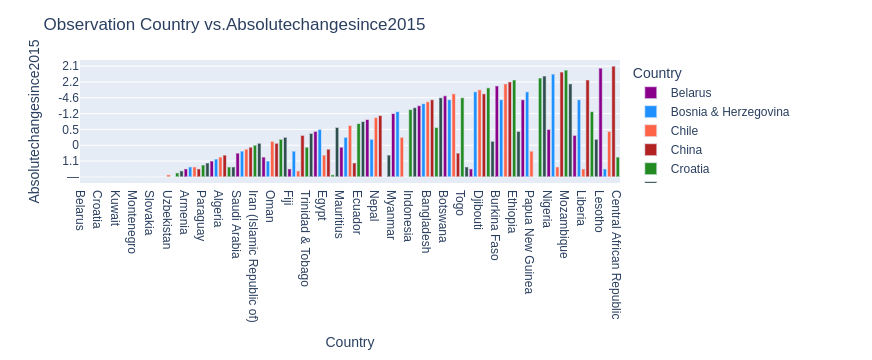

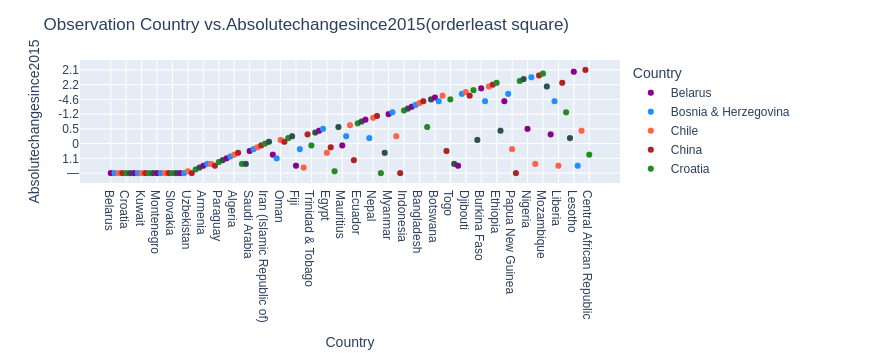

In [31]:
# Custom color palette
color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']

# create barplot Gender.vs BMI :

# Create a bar plot using plotly.graph_objects
fig = px.bar(data, x='Country', y='Absolutechangesince2015', color='Country', color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(title="Observation Country vs.Absolutechangesince2015", xaxis_title="Country", yaxis_title="Absolutechangesince2015")

# Show the figure
fig.show()


#Create lineplot Observation Country vs.Absolutechangesince2015
fig = px.scatter(data, x='Country', y='Absolutechangesince2015', color='Country', color_discrete_sequence=color_palette,trendline='ols')

# Update the layout
fig.update_layout(title="Observation Country vs.Absolutechangesince2015(orderleast square)", xaxis_title="Country", yaxis_title="Absolutechangesince2015")

# Show the figure
fig.show()



array([[<Axes: title={'center': 'Rank'}>]], dtype=object)

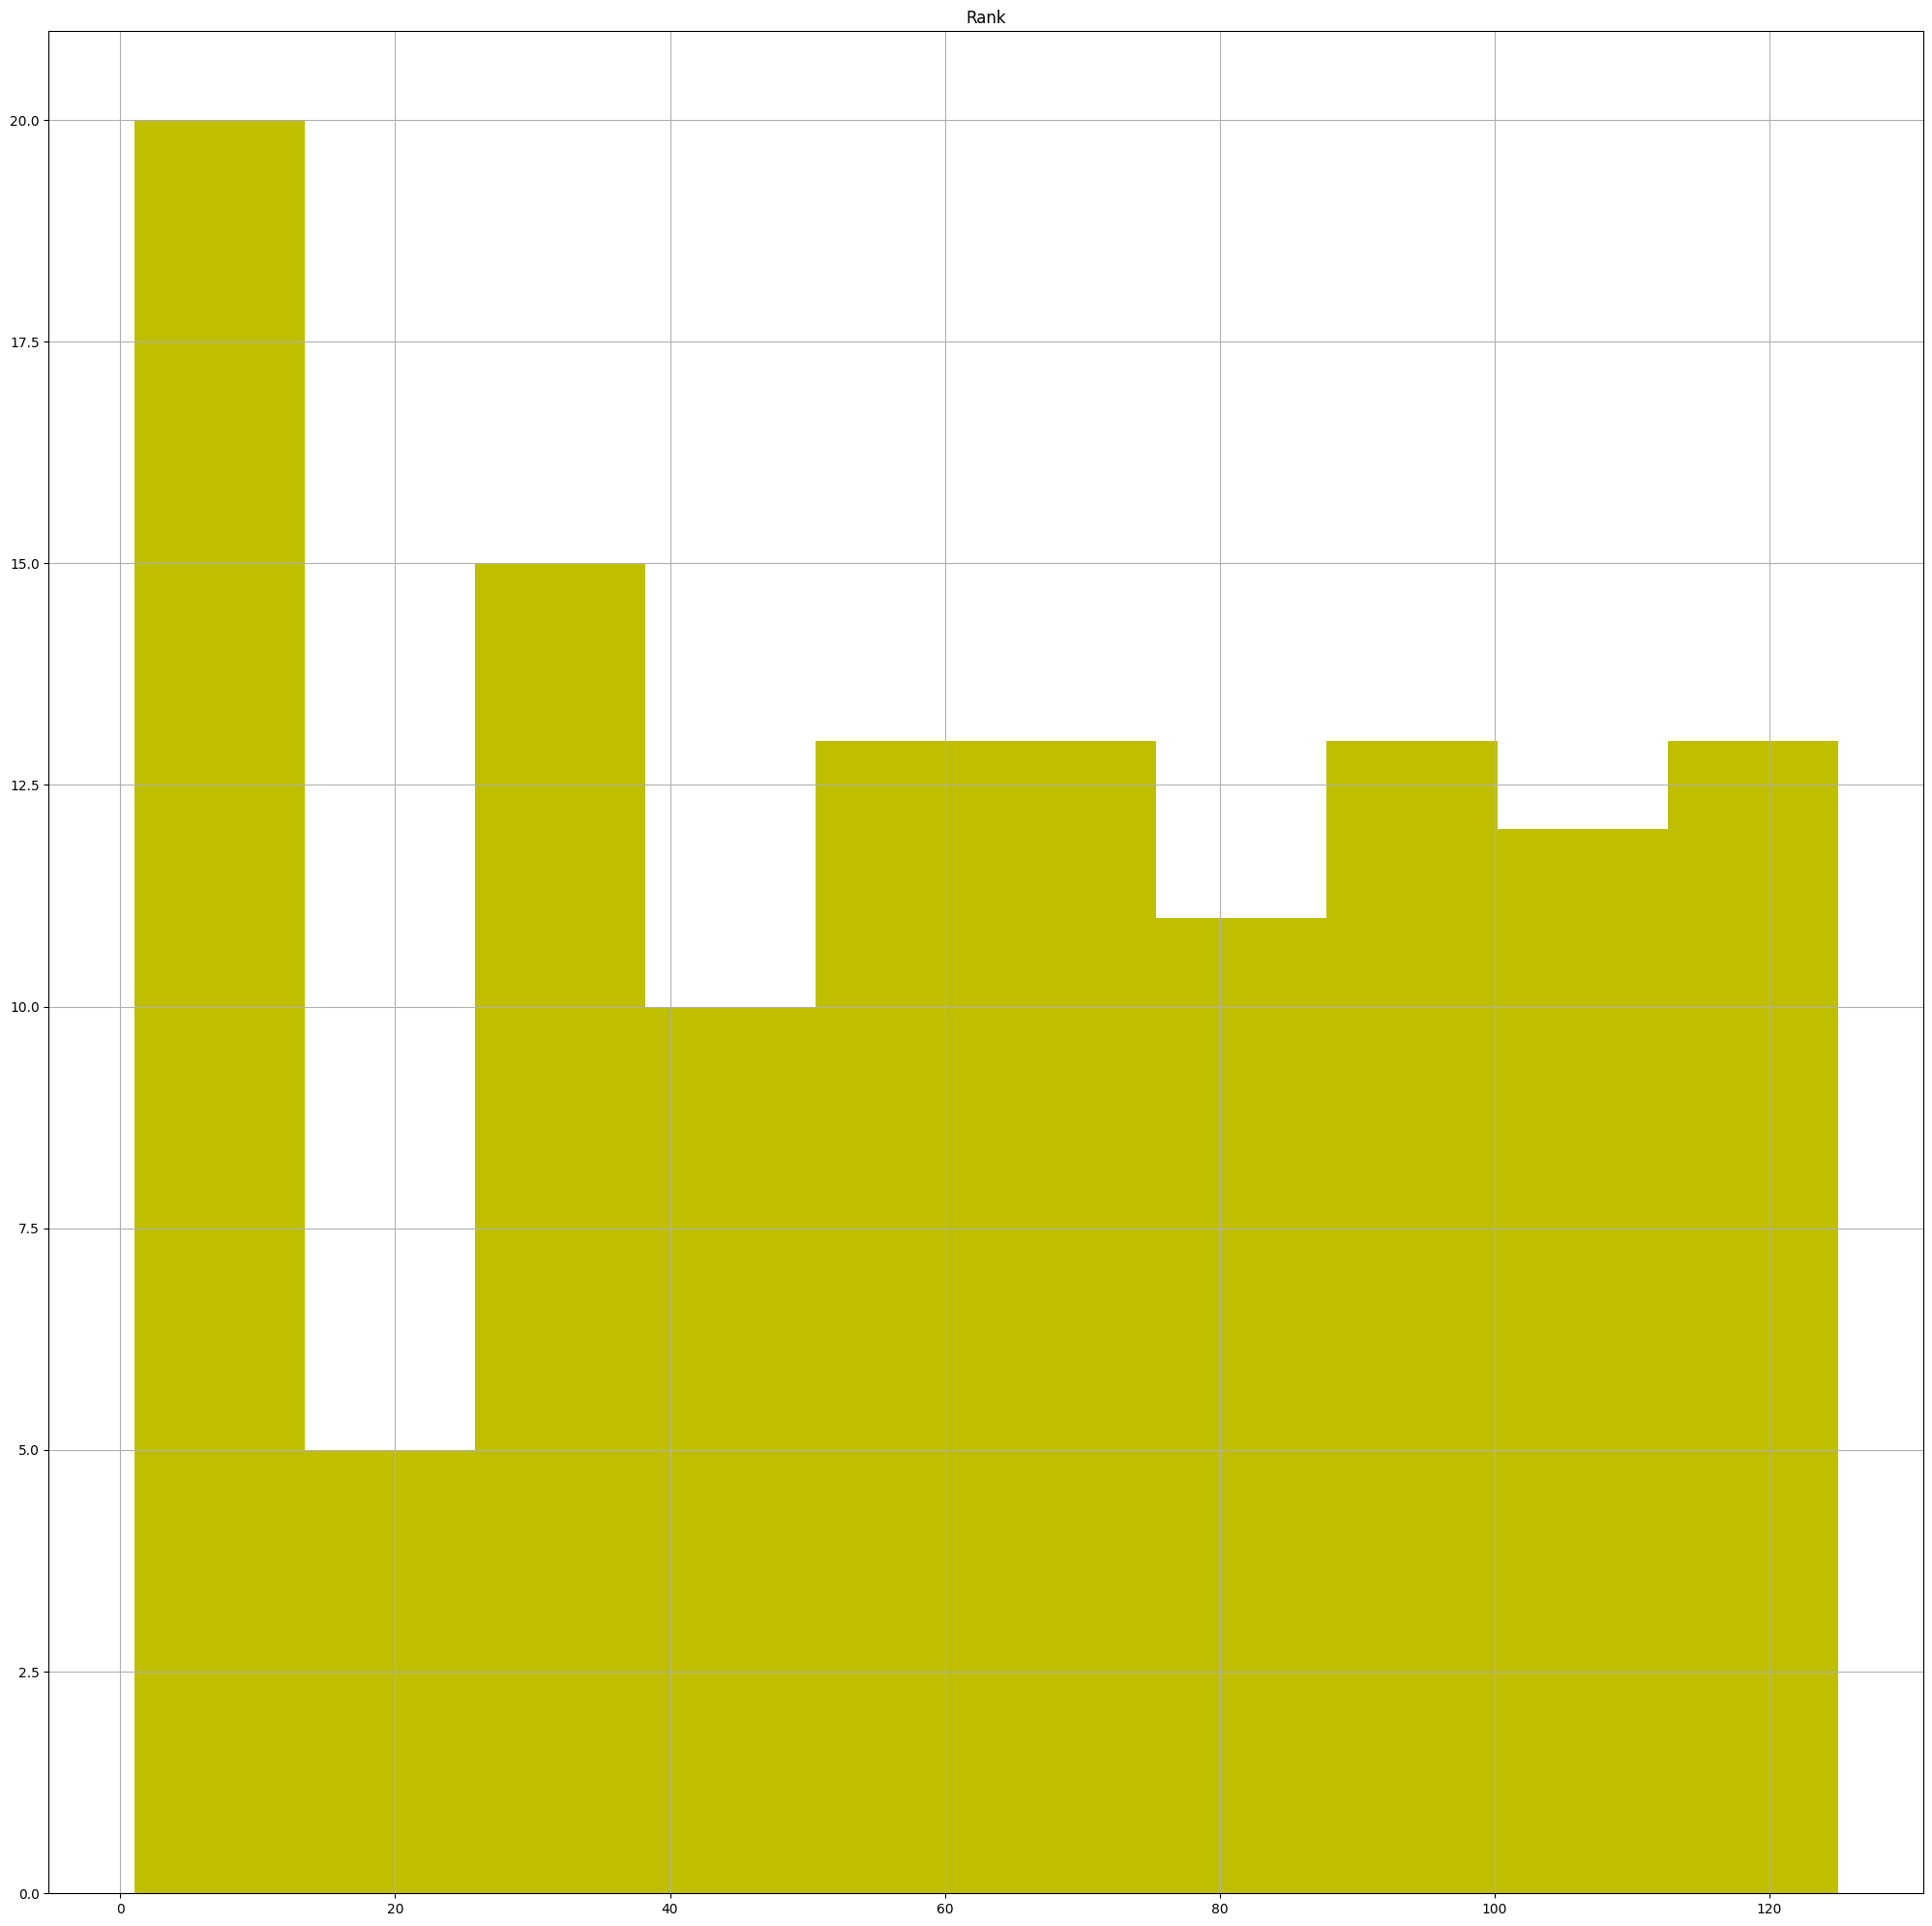

In [32]:
# plot the histgram:
data.hist(figsize=(25,25),color="y")

<Figure size 3600x3000 with 0 Axes>

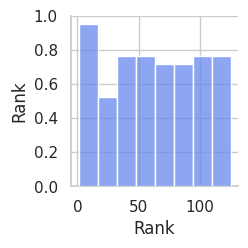

In [33]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'))

In [34]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

Rank  Country  2000  2008  2015  2023  Absolutechangesince2015  \
0       0        8    99    99    94    93                       56   
1       0       11    98    90    73    93                       56   
2       0       21    99    99    94    93                       56   
3       0       22    10    93    94    93                       56   
4       0       27    99    99    94    93                       56   
..    ...      ...   ...   ...   ...   ...                      ...   
120    89       62    51    46    58    62                       55   
121    90       30    78    75    65    63                        4   
122    91      122    71    73    69    64                       18   
123    92       66    73    72    67    65                       52   
124    93       19    80    78    70    66                       13   

     changesince2015  
0                 86  
1                 86  
2                 86  
3                 86  
4                 86  
..               ...  
120               75  
121                5  
122               48  
123               82  
124               45  

[125 rows x 8 columns]

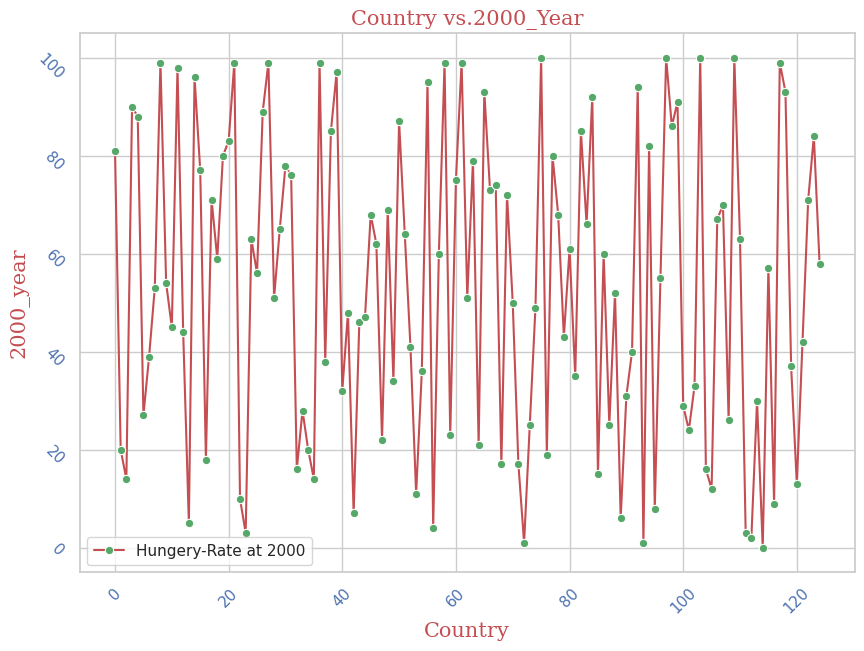

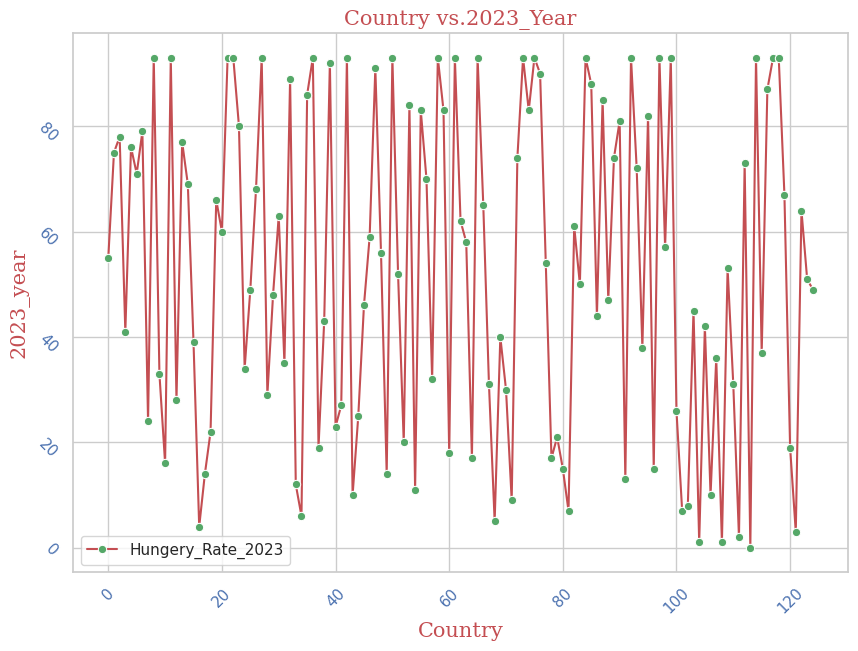

In [35]:
#Lineplot 1 :

f1 = {"family": "serif", "size": 15, "color": "r"}
plt.figure(figsize=(10,7))
plt.title("Country vs.2000_Year",fontdict=f1)

top4=data.groupby("Country")["2000"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="Hungery-Rate at 2000",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("Country",fontdict=f1)
plt.ylabel("2000_year",fontdict=f1)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


#Lineplot2 :

plt.figure(figsize=(10,7))
plt.title("Country vs.2023_Year",fontdict=f1)

top5=data.groupby("Country")["2023"].mean().sort_values(ascending=False)
sns.lineplot(x=top5.index,y=top5.values,color="r",label="Hungery_Rate_2023",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("Country",fontdict=f1)
plt.ylabel("2023_year",fontdict=f1)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


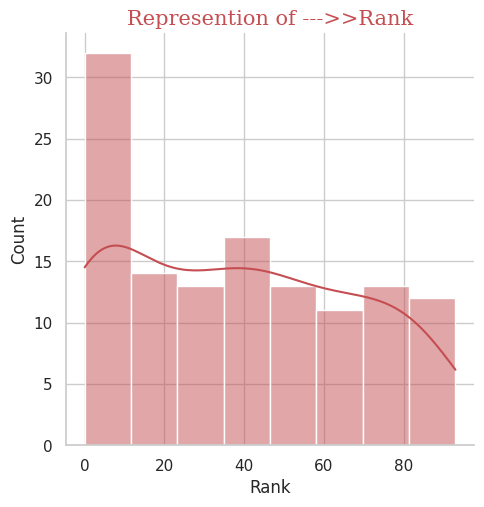

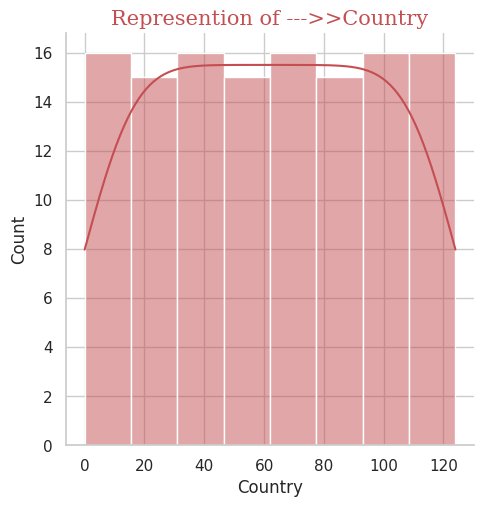

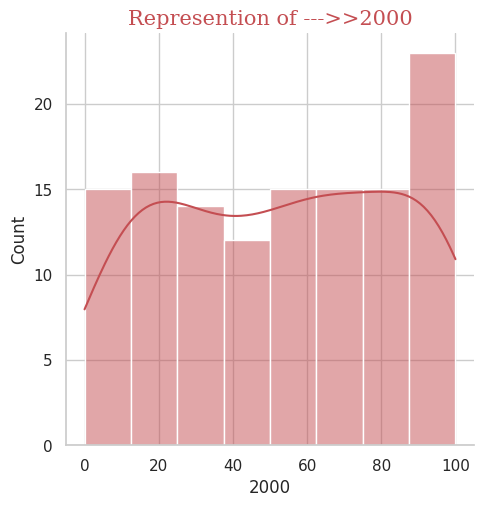

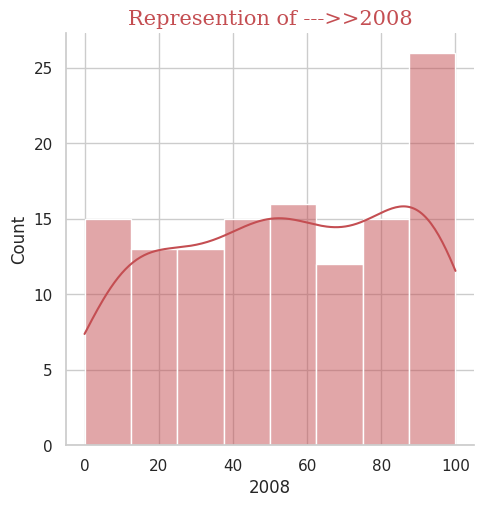

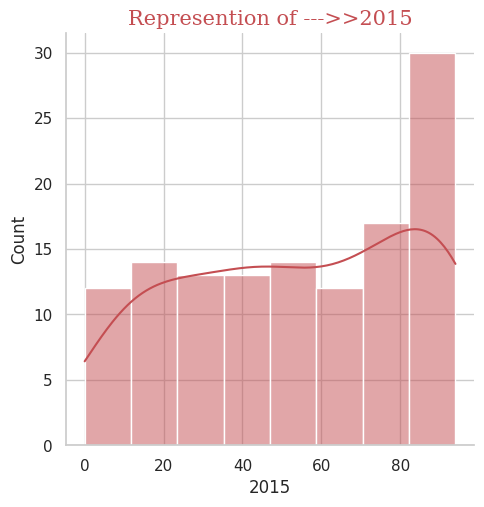

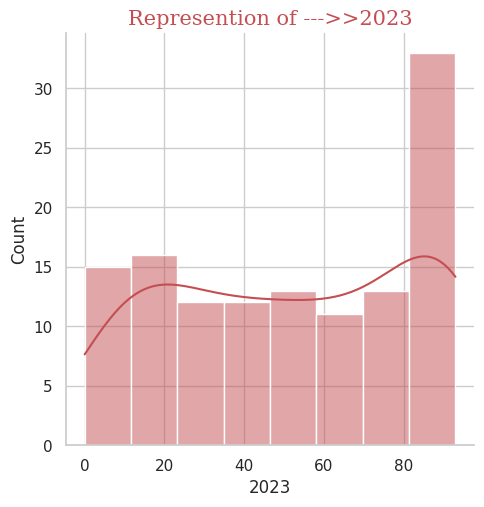

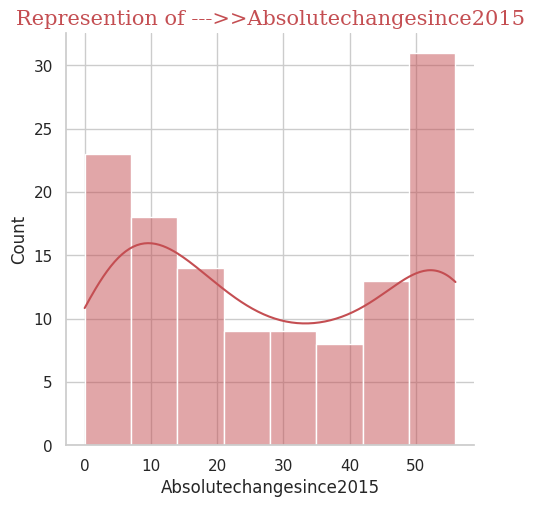

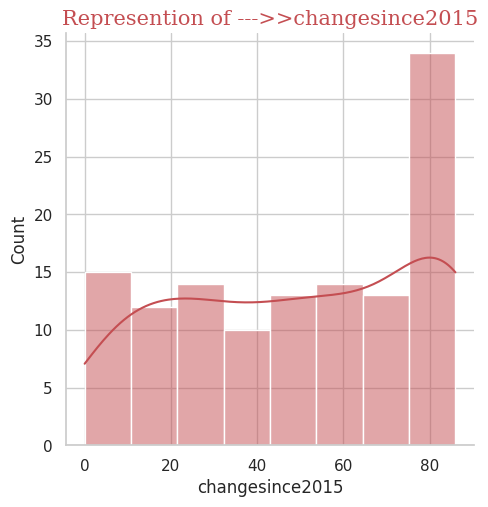

In [36]:
for col in data.select_dtypes("number").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f1)

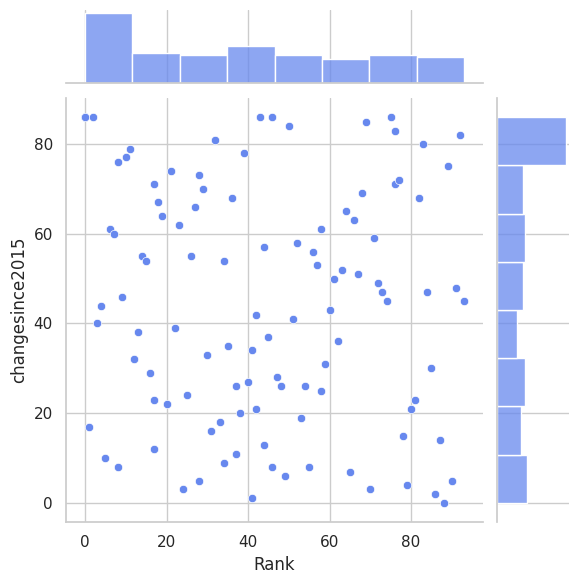

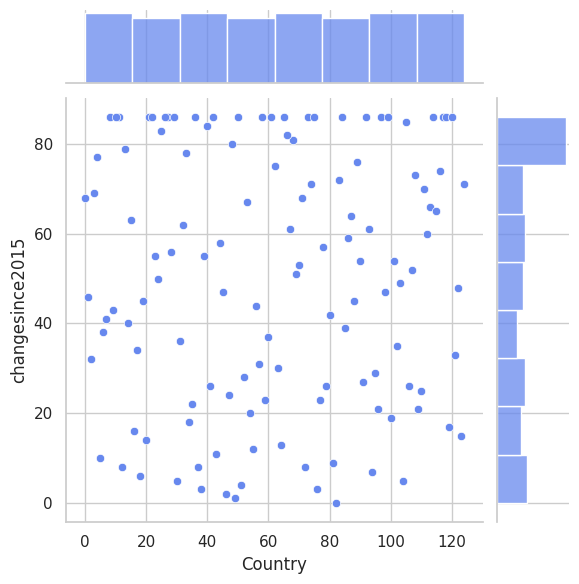

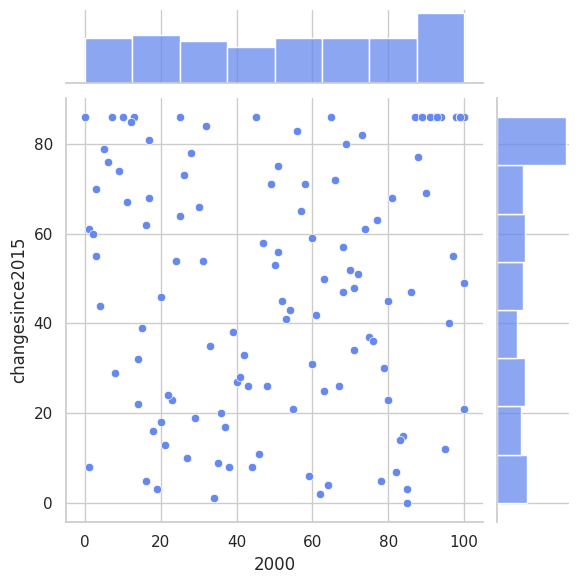

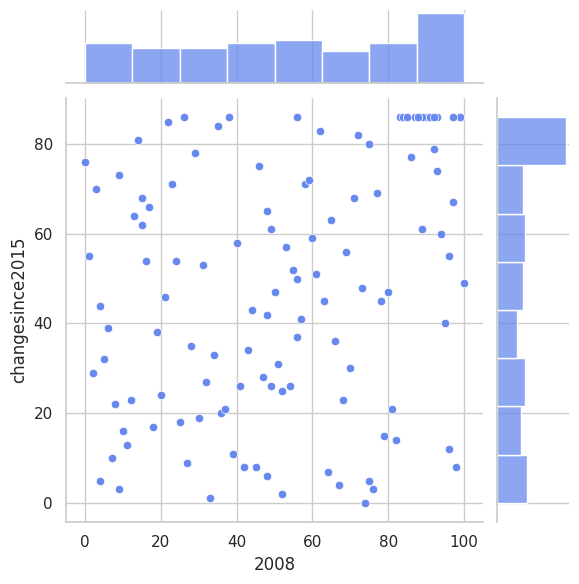

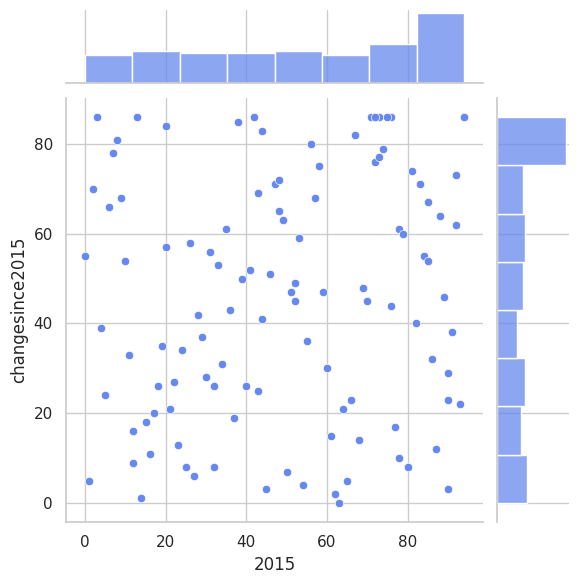

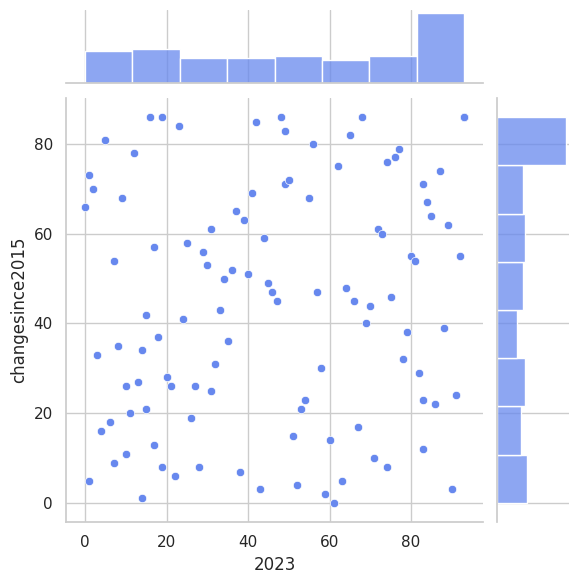

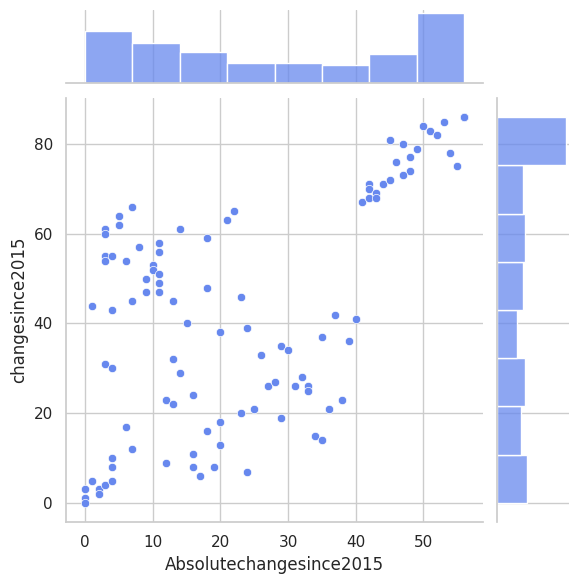

In [37]:
for col in data.select_dtypes("number"):
    if col !="changesince2015":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["changesince2015"],kind="scatter")

## Data processing and Training :(convert Categorical , Labelencoder,StandardScaler)

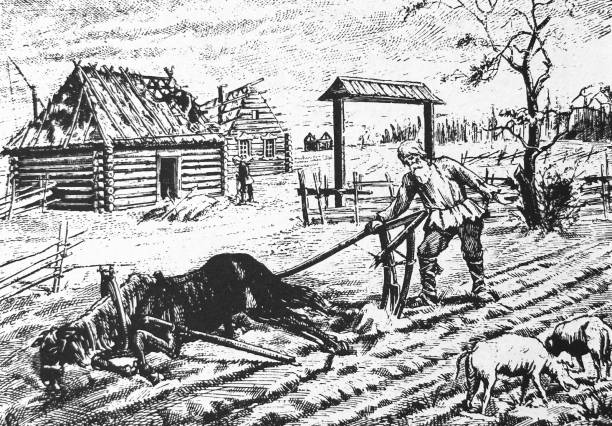

In [38]:
from IPython.display import display ,Image
# image6 :
img6=Image("hunger6.jpg")
display(img6)

In [39]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

Rank  Country  2000  2008  2015  2023  Absolutechangesince2015  \
0       0        8    99    99    94    93                       56   
1       0       11    98    90    73    93                       56   
2       0       21    99    99    94    93                       56   
3       0       22    10    93    94    93                       56   
4       0       27    99    99    94    93                       56   
..    ...      ...   ...   ...   ...   ...                      ...   
120    89       62    51    46    58    62                       55   
121    90       30    78    75    65    63                        4   
122    91      122    71    73    69    64                       18   
123    92       66    73    72    67    65                       52   
124    93       19    80    78    70    66                       13   

     changesince2015  
0                 86  
1                 86  
2                 86  
3                 86  
4                 86  
..               ...  
120               75  
121                5  
122               48  
123               82  
124               45  

[125 rows x 8 columns]

In [40]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

Rank   Country      2000      2008      2015      2023  \
0   -1.316052 -1.496540  1.479662  1.459555  1.349969  1.321805   
1   -1.316052 -1.413399  1.447573  1.165816  0.639673  1.321805   
2   -1.316052 -1.136262  1.479662  1.459555  1.349969  1.321805   
3   -1.316052 -1.108548 -1.376209  1.263729  1.349969  1.321805   
4   -1.316052 -0.969979  1.479662  1.459555  1.349969  1.321805   
..        ...       ...       ...       ...       ...       ...   
120  1.722147  0.000000 -0.060583 -0.270240  0.132318  0.314332   
121  1.756284 -0.886838  0.805805  0.676252  0.369084  0.346831   
122  1.790421  1.662822  0.581186  0.610976  0.504378  0.379330   
123  1.824558  0.110855  0.645363  0.578339  0.436731  0.411829   
124  1.858695 -1.191689  0.869982  0.774165  0.538202  0.444328   

     Absolutechangesince2015  changesince2015  
0                   1.375567         1.273184  
1                   1.375567         1.273184  
2                   1.375567         1.273184  
3                   1.375567         1.273184  
4                   1.375567         1.273184  
..                       ...              ...  
120                 1.325276         0.885018  
121                -1.239579        -1.585128  
122                -0.535501        -0.067753  
123                 1.174402         1.132032  
124                -0.786958        -0.173616  

[125 rows x 8 columns]

## Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

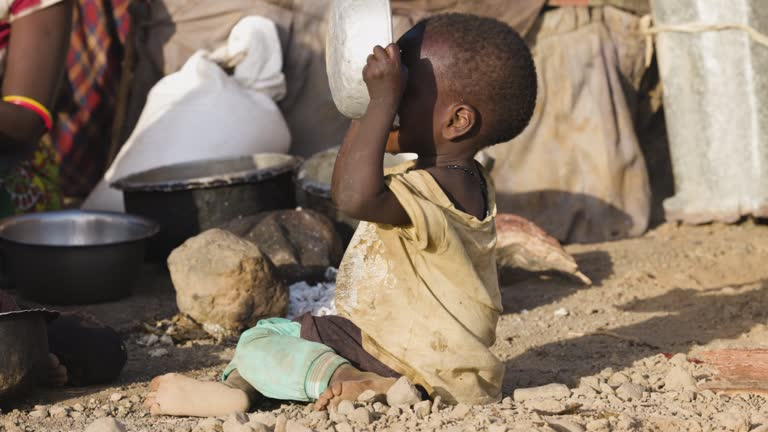

In [41]:
from IPython.display import display ,Image
# image4 :
img7=Image("hunger7.jpg")
display(img7)

In [42]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [43]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)

In [44]:
transform=Var_Selector(data)
transform.fit_transform(data)

Rank  Country  2000  2008  2015  2023  Absolutechangesince2015  \
0       0        8    99    99    94    93                       56   
1       0       11    98    90    73    93                       56   
2       0       21    99    99    94    93                       56   
3       0       22    10    93    94    93                       56   
4       0       27    99    99    94    93                       56   
..    ...      ...   ...   ...   ...   ...                      ...   
120    89       62    51    46    58    62                       55   
121    90       30    78    75    65    63                        4   
122    91      122    71    73    69    64                       18   
123    92       66    73    72    67    65                       52   
124    93       19    80    78    70    66                       13   

     changesince2015  
0                 86  
1                 86  
2                 86  
3                 86  
4                 86  
..               ...  
120               75  
121                5  
122               48  
123               82  
124               45  

[125 rows x 8 columns]

In [45]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  0

Number of duplicates of cleaning it ----->>>  0


In [46]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr

Rank   Country      2000      2008      2015  \
Rank                     1.000000  0.021994  0.203375 -0.011884 -0.407635   
Country                  0.021994  1.000000 -0.100113 -0.042794 -0.087881   
2000                     0.203375 -0.100113  1.000000  0.632110  0.178025   
2008                    -0.011884 -0.042794  0.632110  1.000000  0.360638   
2015                    -0.407635 -0.087881  0.178025  0.360638  1.000000   
2023                    -0.467606 -0.100544  0.201358  0.411070  0.828399   
Absolutechangesince2015 -0.260963 -0.003535  0.242002  0.381318  0.226045   
changesince2015         -0.335313  0.027837  0.144176  0.347446  0.305169   

                             2023  Absolutechangesince2015  changesince2015  
Rank                    -0.467606                -0.260963        -0.335313  
Country                 -0.100544                -0.003535         0.027837  
2000                     0.201358                 0.242002         0.144176  
2008                     0.411070                 0.381318         0.347446  
2015                     0.828399                 0.226045         0.305169  
2023                     1.000000                 0.241691         0.373105  
Absolutechangesince2015  0.241691                 1.000000         0.723958  
changesince2015          0.373105                 0.723958         1.000000

In [47]:
# Calculate Spearman Correlation:
sperman=data.select_dtypes("number").corr(method="spearman")
sperman

Rank   Country      2000      2008      2015  \
Rank                     1.000000  0.016978  0.142949 -0.083071 -0.478893   
Country                  0.016978  1.000000 -0.095109 -0.044469 -0.088002   
2000                     0.142949 -0.095109  1.000000  0.621393  0.186394   
2008                    -0.083071 -0.044469  0.621393  1.000000  0.386799   
2015                    -0.478893 -0.088002  0.186394  0.386799  1.000000   
2023                    -0.523711 -0.096805  0.239548  0.455484  0.832273   
Absolutechangesince2015 -0.313974 -0.008409  0.261825  0.379543  0.244633   
changesince2015         -0.408737  0.024931  0.174713  0.387080  0.356740   

                             2023  Absolutechangesince2015  changesince2015  
Rank                    -0.523711                -0.313974        -0.408737  
Country                 -0.096805                -0.008409         0.024931  
2000                     0.239548                 0.261825         0.174713  
2008                     0.455484                 0.379543         0.387080  
2015                     0.832273                 0.244633         0.356740  
2023                     1.000000                 0.278715         0.433639  
Absolutechangesince2015  0.278715                 1.000000         0.731177  
changesince2015          0.433639                 0.731177         1.000000

In [48]:
# Calculate pearson Correlation:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson


Rank   Country      2000      2008      2015  \
Rank                     1.000000  0.021994  0.203375 -0.011884 -0.407635   
Country                  0.021994  1.000000 -0.100113 -0.042794 -0.087881   
2000                     0.203375 -0.100113  1.000000  0.632110  0.178025   
2008                    -0.011884 -0.042794  0.632110  1.000000  0.360638   
2015                    -0.407635 -0.087881  0.178025  0.360638  1.000000   
2023                    -0.467606 -0.100544  0.201358  0.411070  0.828399   
Absolutechangesince2015 -0.260963 -0.003535  0.242002  0.381318  0.226045   
changesince2015         -0.335313  0.027837  0.144176  0.347446  0.305169   

                             2023  Absolutechangesince2015  changesince2015  
Rank                    -0.467606                -0.260963        -0.335313  
Country                 -0.100544                -0.003535         0.027837  
2000                     0.201358                 0.242002         0.144176  
2008                     0.411070                 0.381318         0.347446  
2015                     0.828399                 0.226045         0.305169  
2023                     1.000000                 0.241691         0.373105  
Absolutechangesince2015  0.241691                 1.000000         0.723958  
changesince2015          0.373105                 0.723958         1.000000

In [49]:
# Calculate Kendall Correlation:
kendall=data.select_dtypes("number").corr(method="kendall")
kendall


Rank   Country      2000      2008      2015  \
Rank                     1.000000  0.004576  0.198503  0.073292 -0.162649   
Country                  0.004576  1.000000 -0.065209 -0.028982 -0.057881   
2000                     0.198503 -0.065209  1.000000  0.594318  0.209980   
2008                     0.073292 -0.028982  0.594318  1.000000  0.381616   
2015                    -0.162649 -0.057881  0.209980  0.381616  1.000000   
2023                    -0.140586 -0.071262  0.222628  0.389533  0.758677   
Absolutechangesince2015 -0.203852 -0.009774  0.184361  0.277469  0.175086   
changesince2015         -0.281797  0.019074  0.117655  0.263669  0.248756   

                             2023  Absolutechangesince2015  changesince2015  
Rank                    -0.140586                -0.203852        -0.281797  
Country                 -0.071262                -0.009774         0.019074  
2000                     0.222628                 0.184361         0.117655  
2008                     0.389533                 0.277469         0.263669  
2015                     0.758677                 0.175086         0.248756  
2023                     1.000000                 0.182704         0.308457  
Absolutechangesince2015  0.182704                 1.000000         0.563258  
changesince2015          0.308457                 0.563258         1.000000

(0.0, 130.2)

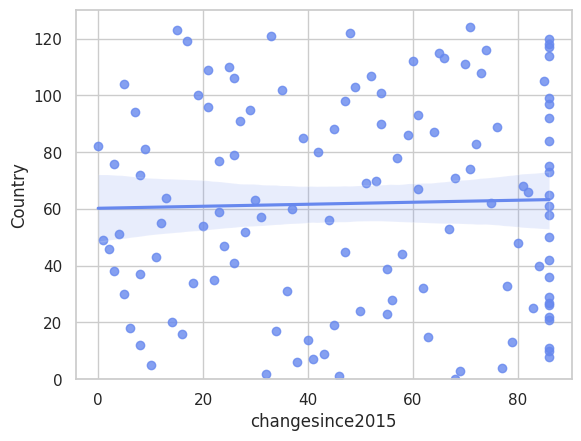

In [50]:
# Type of Relation between changesince2015 & Country :No relation
sns.regplot(x=data["changesince2015"],y=data["Country"])
plt.ylim(0,)

(0.0, 58.8)

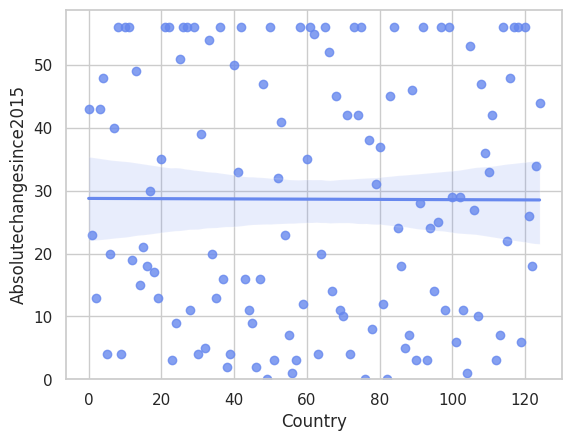

In [51]:
# Type of Relation between Absolutechangesince2015 & Country : NO relation
sns.regplot(x=data["Country"],y=data["Absolutechangesince2015"])
plt.ylim(0,)

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

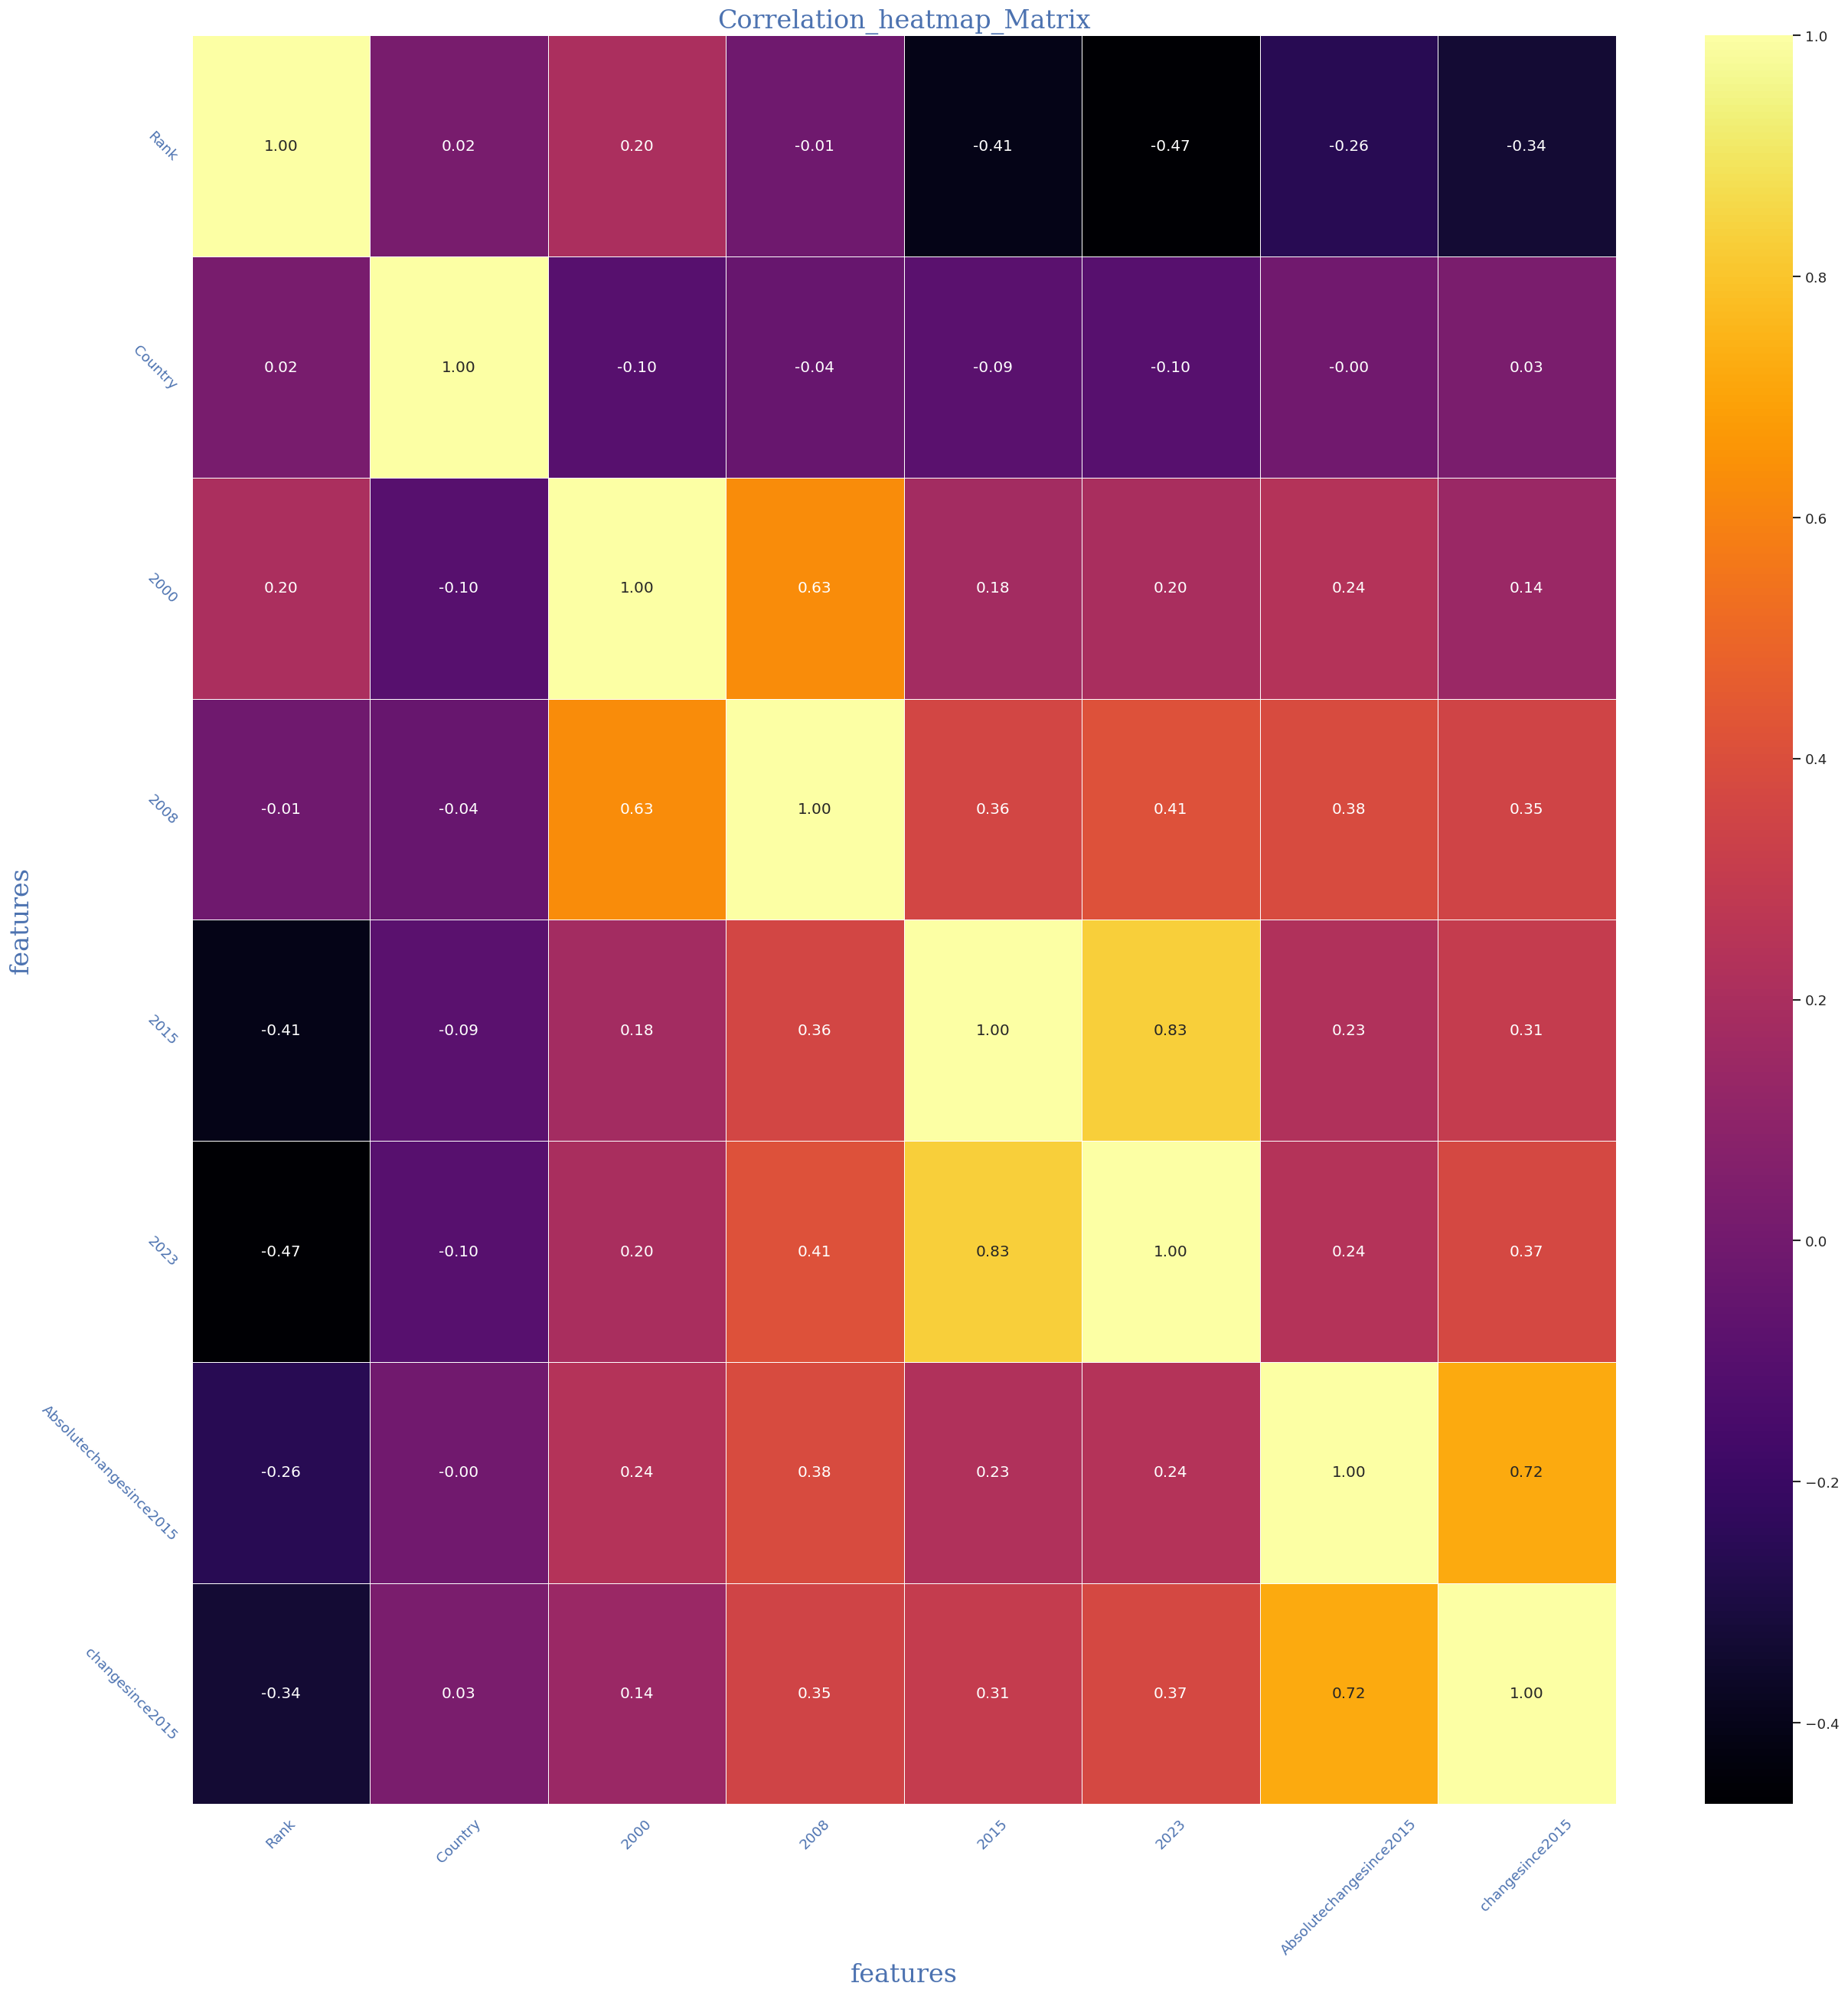

In [52]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='inferno',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)


In [53]:
# No outliers found :
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Rank feature

Q1 of Rank --->>> 11.0 

 Q3 of Rank ---->>> 63.0 

 iqr--->>52.0

 low_limit--->>>-67.0 

  upper_limit--->>> 141.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in Country feature

Q1 of Country --->>> 31.0 

 Q3 of Country ---->>> 93.0 

 iqr--->>62.0

 low_limit--->>>-62.0 

  upper_limit--->>> 186.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in 2000 feature

Q1 of 2000 --->>> 25.0 

 Q3 of 2000 ---->>> 80.0 

 iqr--->>55.0

 low_limit--->>>-57.5 

  upper_limit--->>> 162.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in 2008 feature

Q1 of 2008 --->>> 28.0 

 Q3 of 2008 ---->>> 83.0 

 iqr--->>55.0

 low_limit--->>>-54.5 

  upper_limit--->>> 165.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


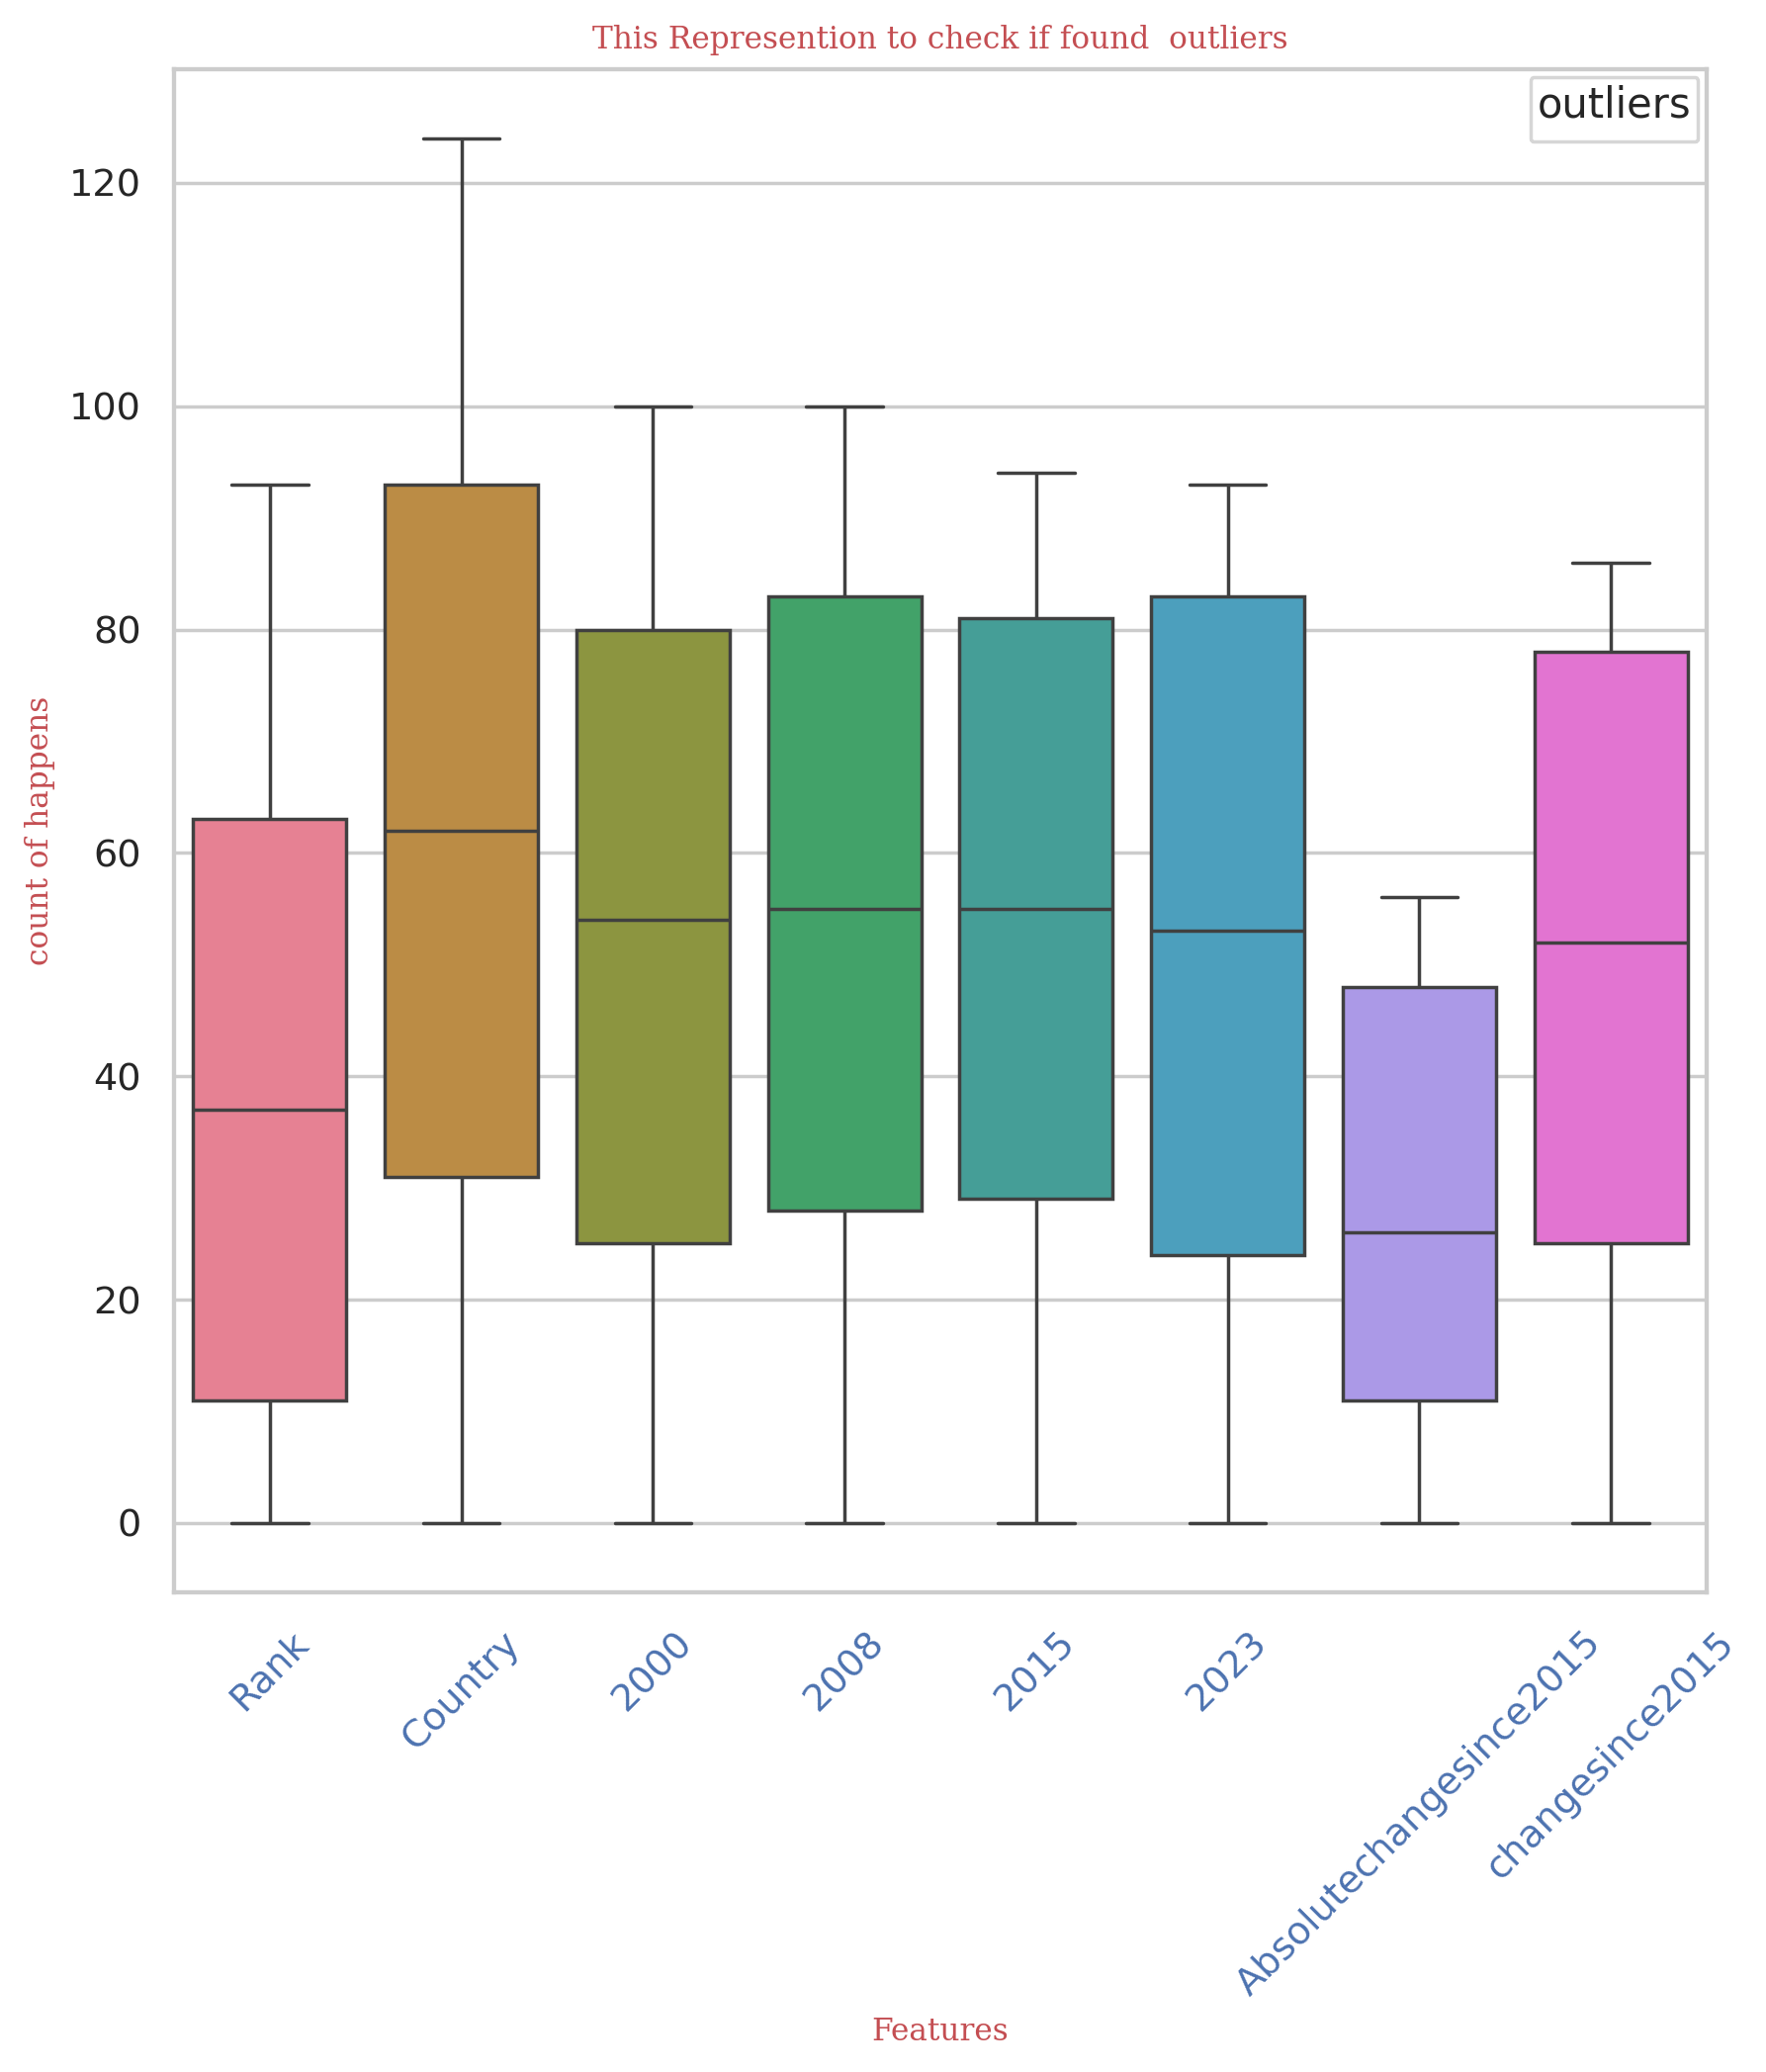

In [54]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(8,8),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

In [55]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=7)
mic.fit(data.drop(columns="changesince2015").select_dtypes("number").fillna(0),data["changesince2015"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="changesince2015").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

Country                    0.000000
2008                       0.128591
2000                       0.131216
2015                       0.149072
2023                       0.200024
Rank                       0.249017
Absolutechangesince2015    1.055654
dtype: float64

In [56]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=7)
fs.fit(data.drop(columns="changesince2015").select_dtypes("number").fillna(0),data["changesince2015"])

SelectKBest(k=7)

In [57]:
print(["{:10f}".format(p) for p in  fs.pvalues_])
print(["{:10f}".format(p) for p in fs.scores_])

['  0.014662', '  0.458672', '  0.920570', '  0.060510', '  0.340001', '  0.025519', '  0.000000']

['  1.900636', '  1.039428', '  0.689481', '  1.573261', '  1.133160', '  1.773443', ' 33.804644']


In [58]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="changesince2015").select_dtypes("number").fillna(0).columns)

In [59]:
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

pvalues      score                    input
0  1.466179e-02   1.900636                     Rank
1  4.586724e-01   1.039428                  Country
2  9.205695e-01   0.689481                     2000
3  6.051038e-02   1.573261                     2008
4  3.400011e-01   1.133160                     2015
5  2.551937e-02   1.773443                     2023
6  2.241968e-21  33.804644  Absolutechangesince2015

## End Project 

* Here is the end of project .

* if you find my work useful , upvote me and if you have any question Leave me in comments .

* Devloper : AbdalRhman Gameel Ahmed Hebishy .

* Another Works : https://www.kaggle.com/abdalrhamnhebishy/code   